In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot  as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Ballons%20positive.csv")

In [3]:
data.head(2)

,Unnamed: 0,Color,size,act,age,inflated
0,0,YELLOW,SMALL,STRETCH,ADULT,T
1,1,YELLOW,SMALL,STRETCH,ADULT,T


In [4]:
data.tail(2)

,Unnamed: 0,Color,size,act,age,inflated
18,18,PURPLE,LARGE,DIP,ADULT,F
19,19,PURPLE,LARGE,DIP,CHILD,F


In [5]:
data1=data.drop('Unnamed: 0', axis=1)

In [6]:
data1.head(2)

,Color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,ADULT,T


In [7]:
data1.isnull().sum()

Color       0
size        0
act         0
age         0
inflated    0
dtype: int64

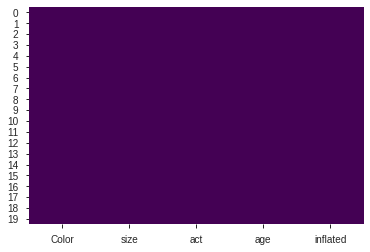

In [8]:
sns.heatmap(data1.isnull(),cbar=False,cmap='viridis')

In [9]:
data1.columns

Index(['Color', 'size', 'act', 'age', 'inflated'], dtype='object')

In [10]:
size={'SMALL':0,'LARGE':1}
data1['size']=data1['size'].map(size)

act={'DIP':0,'STRETCH':1}
data1['act']=data1['act'].map(act)

age={'ADULT':0,'CHILD':1}
data1['age']=data1['age'].map(age)


In [11]:
data1.head()

,Color,size,act,age,inflated
0,YELLOW,0,1,0,T
1,YELLOW,0,1,0,T
2,YELLOW,0,1,1,F
3,YELLOW,0,0,0,F
4,YELLOW,0,0,1,F


In [17]:
cole={'YELLOW':0,'PURPLE':1}
data1['Color']=data1['Color'].map(cole)

In [18]:
inf={'T':0,'F':1}
data1['inflated']=data1['inflated'].map(inf)

In [19]:
data1.head(3)

,Color,size,act,age,inflated
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,1,1


In [20]:
from sklearn.model_selection import train_test_split
x=data1.drop('inflated',axis=1)
y=data1['inflated']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15, 4)
(15,)
(5, 4)
(5,)


In [22]:
from sklearn.svm import SVC
clf=BaggingClassifier(base_estimator=SVC())
clf.fit(x,y)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [25]:
trine_score=clf.score(x_train,y_train)
trine_score

1.0

In [26]:
test_score=clf.score(x_test,y_test)
test_score

1.0

In [27]:
yhat=clf.predict(x_test)

In [28]:
yhat

array([1, 0, 0, 0, 1])

In [29]:
pd.DataFrame({'Acutual Data':y_test,'New_prediction':yhat})

,Acutual Data,New_prediction
3,1,1
16,0,0
6,0,0
10,0,0
2,1,1


In [30]:
#Accuracy Evaluation
from sklearn import metrics
print("Trine Set Accuracy:",metrics.accuracy_score(y_train,clf.predict(x_train)))
print("Test Set Accuracy:",metrics.accuracy_score(y_test,yhat))

Trine Set Accuracy: 1.0
Test Set Accuracy: 1.0


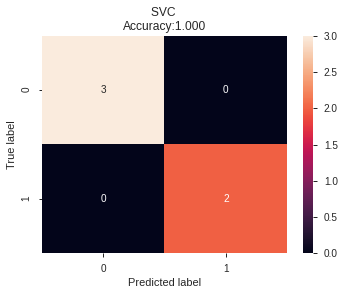

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

import matplotlib.pyplot as plt
clf1 = SVC().fit(x_train,y_train)
clf1.predict(x_train)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVC \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[3 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



Confusion matrix, without normalization


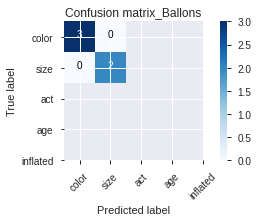

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(5,3))
plot_confusion_matrix(cnf_matrix, classes=['color', 'size','act','age', 'inflated'],
                      title='Confusion matrix_Ballons')

plt.savefig('Ballons.png')
